<IPython.core.display.Javascript object>


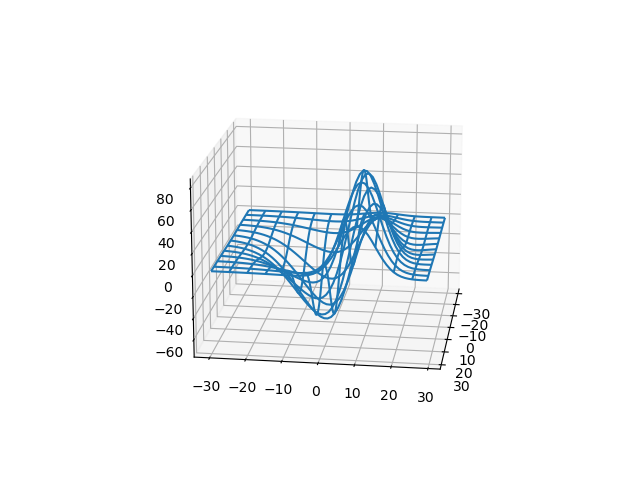

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

https://www.meccanismocomplesso.org/en/3d-rotations-and-euler-angles-in-python/

In [4]:
import numpy as np
import math as m
  
def Rx(theta):
    return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])
  
def Ry(theta):
    return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])
  
def Rz(theta):
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

In [5]:
phi = m.pi/2
theta = m.pi/4
psi = m.pi/2
print("phi =", phi)
print("theta  =", theta)
print("psi =", psi)
  
  
R = Rz(psi) * Ry(theta) * Rx(phi)
print(np.round(R, decimals=2))

phi = 1.5707963267948966
theta  = 0.7853981633974483
psi = 1.5707963267948966
[[ 0.   -0.    1.  ]
 [ 0.71  0.71 -0.  ]
 [-0.71  0.71  0.  ]]


In [7]:
import sys
tol = sys.float_info.epsilon * 10
  
if abs(R.item(0,0))< tol and abs(R.item(1,0)) < tol:
    eul1 = 0
    eul2 = m.atan2(-R.item(2,0), R.item(0,0))
    eul3 = m.atan2(-R.item(1,2), R.item(1,1))
else:   
    eul1 = m.atan2(R.item(1,0),R.item(0,0))
    sp = m.sin(eul1)
    cp = m.cos(eul1)
    eul2 = m.atan2(-R.item(2,0),cp*R.item(0,0)+sp*R.item(1,0))
    eul3 = m.atan2(sp*R.item(0,2)-cp*R.item(1,2),cp*R.item(1,1)-sp*R.item(0,1))
  
print("phi =", eul1)
print("theta  =", eul2)
print("psi =", eul3)

phi = 1.5707963267948966
theta  = 0.7853981633974483
psi = 1.5707963267948966


In [9]:
v1 = np.array([[1],[0],[0]])
v2 = R * v1
print(np.round(v2, decimals=2))

[[ 0.  ]
 [ 0.71]
 [-0.71]]


<IPython.core.display.Javascript object>


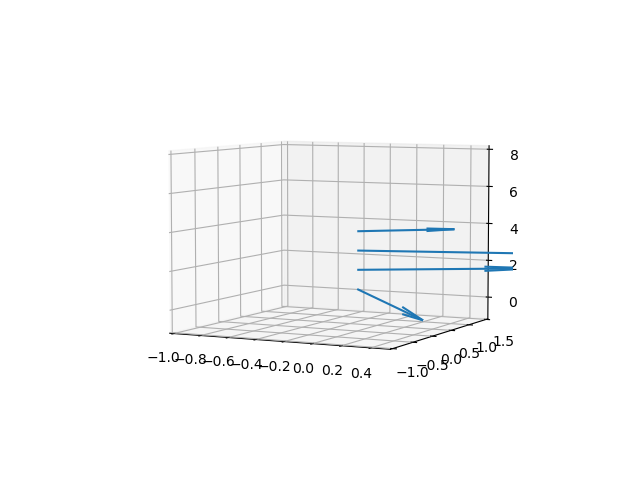

In [12]:

soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
                [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
plt.show()



<IPython.core.display.Javascript object>


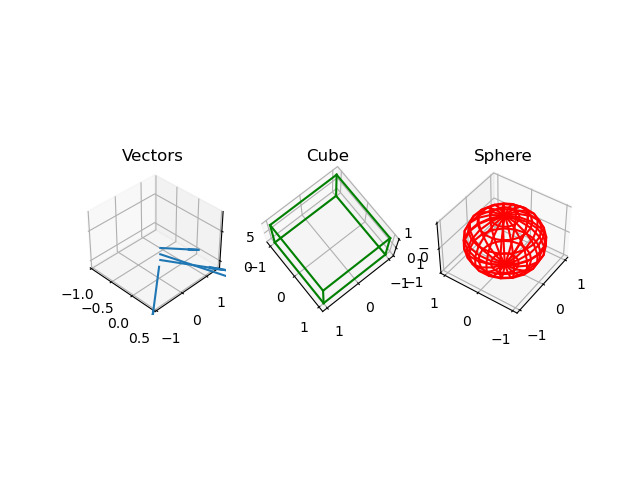

In [13]:
from itertools import product, combinations

fig = plt.figure()

# draw vector
soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
               [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

X, Y, Z, U, V, W = zip(*soa)
ax = fig.add_subplot(131, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
ax.set_title("Vectors")

# draw cube
ax = fig.add_subplot(132, projection='3d')
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
   if np.sum(np.abs(s-e)) == r[1]-r[0]:
      ax.plot3D(*zip(s, e), color="green")
ax.set_title("Cube")

# draw sphere
ax = fig.add_subplot(133, projection='3d')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="red")
ax.set_title("Sphere")

plt.show()